# Linear Regression

<!-- 
LR:
    https://discuss.pennylane.ai/t/performing-linear-or-non-linear-regression-with-pennylane/31/2
VQLR:
    https://pennylane.ai/qml/demos/tutorial_vqls/
QNN:
    https://pennylane.ai/qml/demos/quantum_neural_net/
-->

0.03261643837838472
0.01597249410699671
0.010127707092627274
0.008075216728184785
0.007354451936281802
0.007101343861210234
0.007012460915780452
0.006981248249072593
0.006970287422354877
0.006966438352890225
0.006965086690636507
0.006964612032835484
0.006964445349163245
0.006964386815528009
0.006964366260506569
0.006964359042282306
0.00696435650748752
0.00696435561735381
0.006964355304769129
0.00696435519500003
Predicted m: 0.42342671551287125, b: 1.2738023170728834


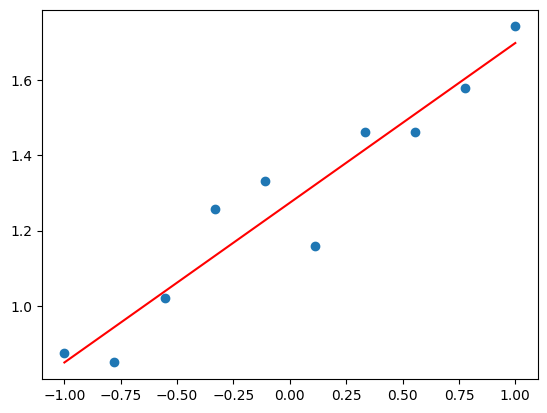

In [5]:
import pennylane as qml
from pennylane import numpy as np

x = np.linspace(-1,1,10)

np.random.seed(0)
m,b = 0.5, 1.2
y_data = m * x + b + 0.1 * np.random.randn(10)
def y_pred(weights):
    return weights[0] * x + weights[1]

def cost(weights):
    y_pred_ = y_pred(weights)
    mse = np.mean((y_data - y_pred_) ** 2)
    return mse

opt = qml.GradientDescentOptimizer(0.5)

init_weights = np.array([0.0, 0.0], requires_grad=True)
weights = init_weights

for step in range(20):
    weights = opt.step(cost, weights)
    print(cost(weights))

print(f"Predicted m: {weights[0]}, b: {weights[1]}")

import matplotlib.pyplot as plt
plt.scatter(x,y_data)
plt.plot(x, y_pred(weights),'r')
plt.show()

# Variational Quantum Linear Solver